# Data Story

### Import librarys and cleaned dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/diabetic_data_clean.csv', header=0)
df.shape

(69973, 44)

## Q1. What are the relationships between numerical variables and readmission?

### Approach: Create scratterlots of numerical variables and label readmission categories to check whether there are correlation trends between them. Create boxplot/stripplot of numerical variables seperated by readmission categories to see the distrubution of the data between two readmission categories.

- Scatterplot of variables `num_procedures`, `number_diagnoses`, `num_medications`,`num_lab_procedures`. Those four numerical variables are about how many procedures/diagnoses/medications have been given and they are in similar scales.

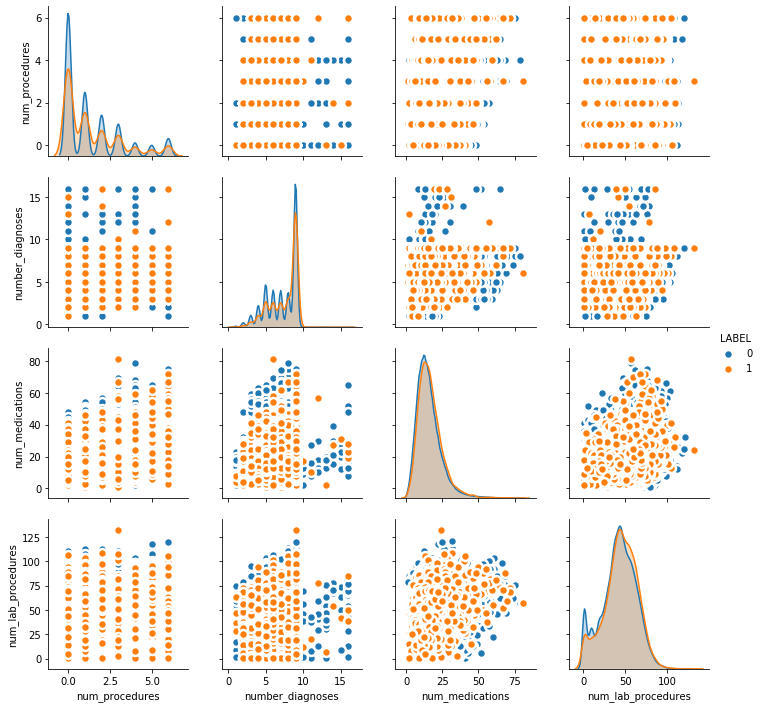

In [3]:
sns.pairplot(df, vars = ['num_procedures', 'number_diagnoses', 'num_medications','num_lab_procedures'],
             kind="scatter", hue="LABEL",  plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

- Scatterplot of variables `number_outpatient`, `number_inpatient`, `number_emergency`, `num_lab_procedures`. Those three numerical variables are about different type of clinic/hospital visits in the year precdeing the encounter and they are in similar scales.

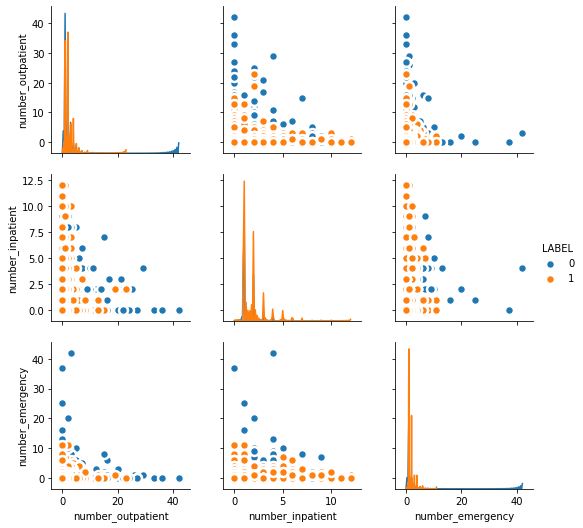

In [4]:
sns.pairplot(df, vars = ['number_outpatient', 'number_inpatient','number_emergency'],
             kind="scatter", hue="LABEL",  plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

- Boxplot and strip plot of numerical variables by readmission catetories (0, 1).

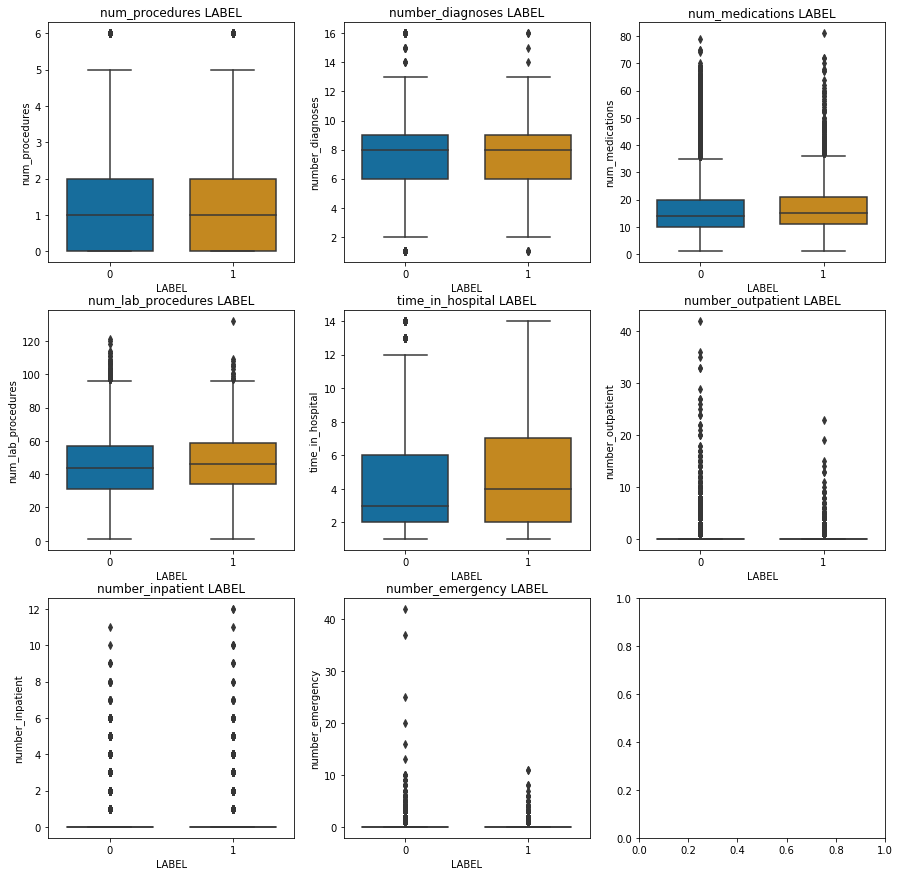

In [5]:
def bplot_label(df, col, ax=None):
    bplot = sns.boxplot(x='LABEL', y=col, 
                        data=df, width=0.7, 
                        palette="colorblind", ax=ax)
    #bplot = sns.violinplot(x='LABEL', y=col, 
    #                    data=df, width=0.5, 
    #                    palette="colorblind", ax=ax)
    bplot.set_title(col + ' LABEL')
    
fig, axes = plt.subplots(3,3,figsize=(15,15))
bplot_label(df, 'num_procedures', ax=axes[0,0])
bplot_label(df, 'number_diagnoses', ax=axes[0,1])
bplot_label(df, 'num_medications', ax=axes[0,2])
bplot_label(df, 'num_lab_procedures', ax=axes[1,0])
bplot_label(df, 'time_in_hospital', ax=axes[1,1])
bplot_label(df, 'number_outpatient', ax=axes[1,2])
bplot_label(df, 'number_inpatient', ax=axes[2,0])
bplot_label(df, 'number_emergency', ax=axes[2,1])

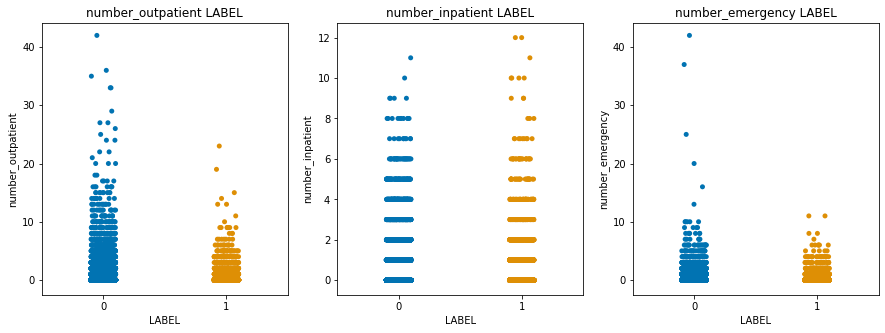

In [6]:
def stripplot_label(df, col, ax=None):
    splot = sns.stripplot(x='LABEL', y=col, 
                        data=df, 
                        palette="colorblind", jitter=True, ax=ax)
    splot.set_title(col + ' LABEL')
    
fig, axes = plt.subplots(1,3,figsize=(15,5))
stripplot_label(df, 'number_outpatient', ax=axes[0])
stripplot_label(df, 'number_inpatient', ax=axes[1])
stripplot_label(df, 'number_emergency', ax=axes[2])

### Results and conclusions
- Low posistive correlations are present between `num_medications` and `num_lab_procedures`, `num_medications` and `number_diagnoses`.
  
  
- No linear relationships between different type of hospital/clinic visits preceding the encounters.
 
  
- Readmission has relationships with those numerical variables: 
    * Readmissions tend to be associated with *low* `number_emergency` and `number_outpatient`. The readmission encounters have < 25 number of outpatient visit and have < 12 number of emergency visits preceding the encounter.
    * The readmission encounters tend to have higher number of medications (`num_medications`) and higher number of lab proceduces (`num_lab_procedures`). 
    * The longer time stay (`time_in_hospital`, between 1 day and 14 days) in hospital, the more chance to have readmission.

## Q2. What are the relationships between categorical variables and readmissions?

### Approach: Create barplots of those categorical variables by readmission categories. And create barplots of proportion of readmission by different values of a categorical variable.

In [7]:
def cat_barplot(data, var, txt, fgsz, xtickrot=0):

    fig, axes = plt.subplots(1, 2, figsize=fgsz)

    sns.countplot(x = data[var].sort_values(), hue = data['LABEL'], ax=axes[0])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=xtickrot, horizontalalignment='center')
    axes[0].set_title(txt + ' VS. Readmission')

    tbl = pd.pivot_table(data, values='encounter_id', index=[var], columns='LABEL', aggfunc='count', margins=False)
    props = tbl.iloc[:,1]/tbl.apply(sum, axis=1)
    sns.barplot(props.index, props.values, ax=axes[1])
    axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=xtickrot, horizontalalignment='center')
    axes[1].set_title(txt +' VS. Proportion of Readmission')
    axes[1].set_ylabel('Proportion')
    
    for p in axes[1].patches:
        axes[1].annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')

    fig.suptitle(txt, y=1.03, fontsize=16)

    plt.tight_layout()
    plt.show()

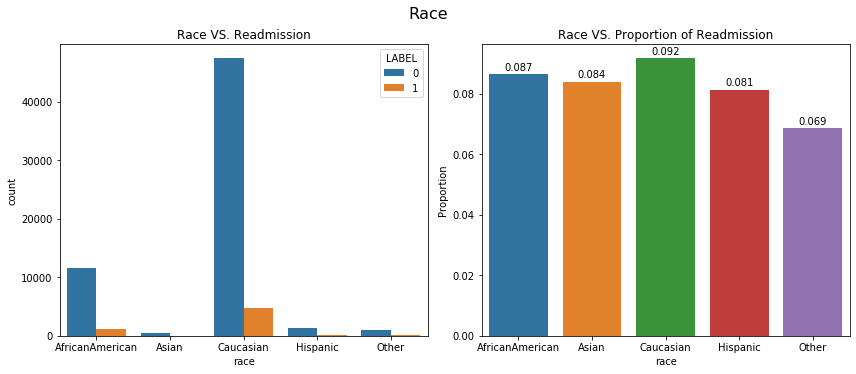

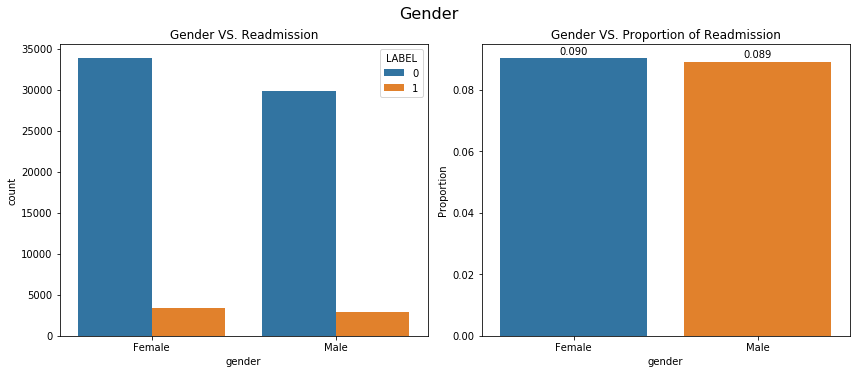

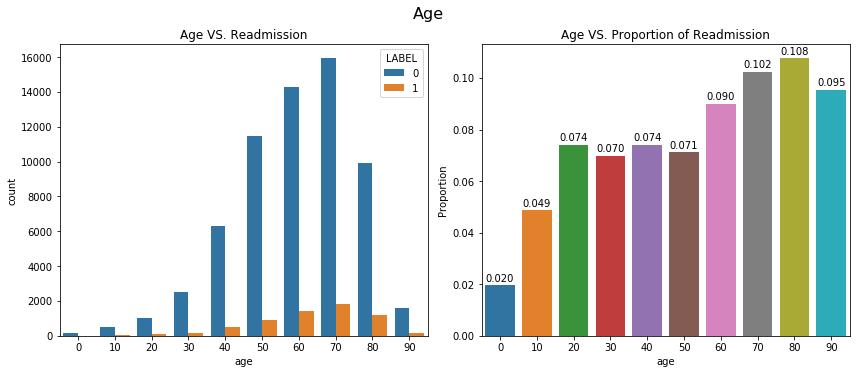

In [8]:
# Demographic variables
cat_barplot(data=df, var='race', txt='Race', fgsz=(12, 5))
cat_barplot(data=df, var='gender', txt='Gender', fgsz=(12, 5))
cat_barplot(data=df, var='age', txt='Age', fgsz=(12, 5))

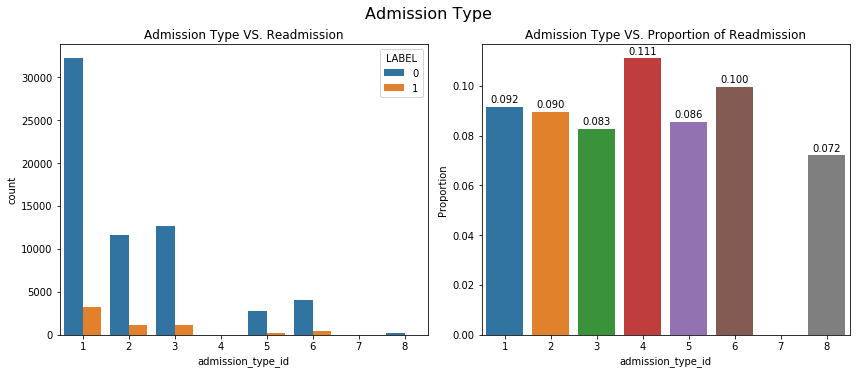

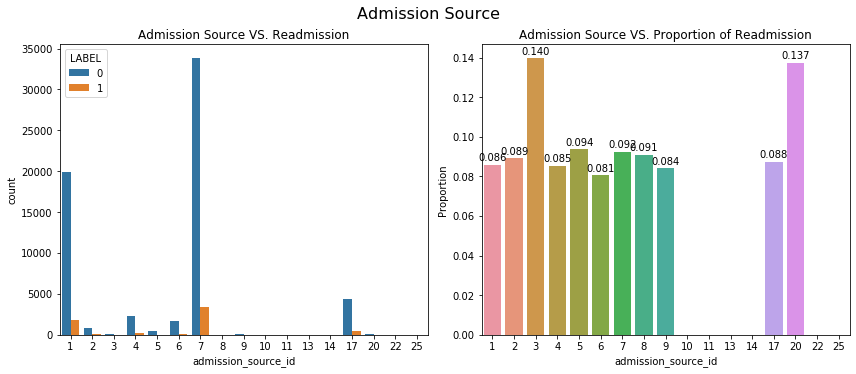

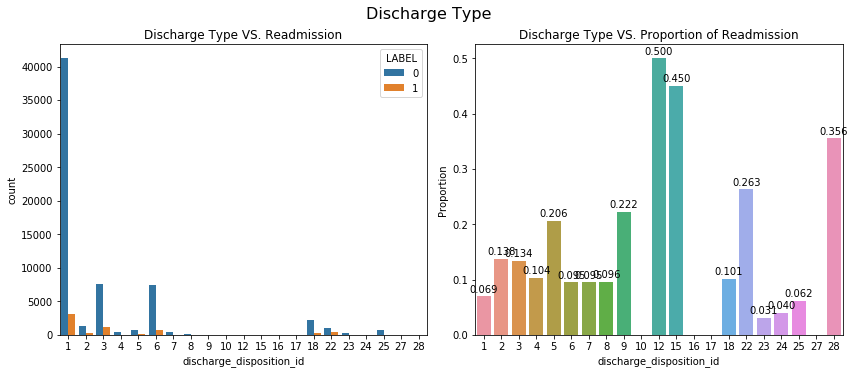

In [9]:
# admission and discharge types
cat_barplot(data=df, var='admission_type_id', txt='Admission Type', fgsz=(12, 5))
cat_barplot(data=df, var='admission_source_id', txt='Admission Source', fgsz=(12, 5))
cat_barplot(data=df, var='discharge_disposition_id', txt='Discharge Type', fgsz=(12, 5))

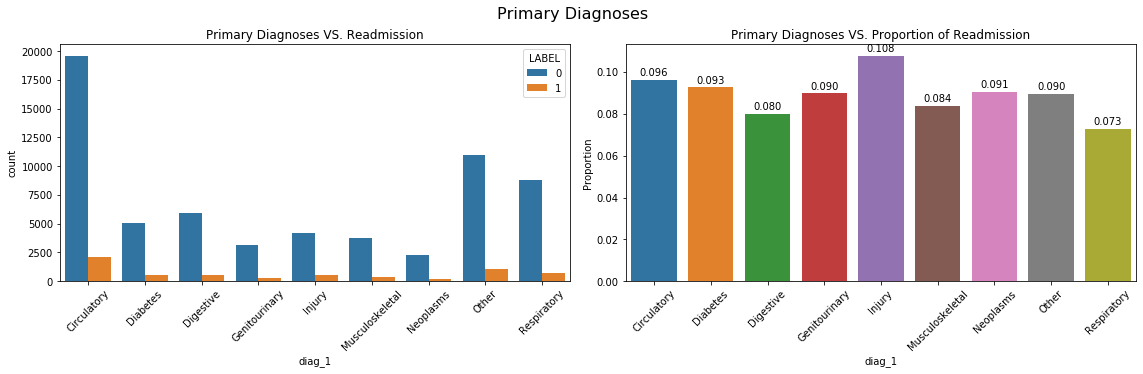

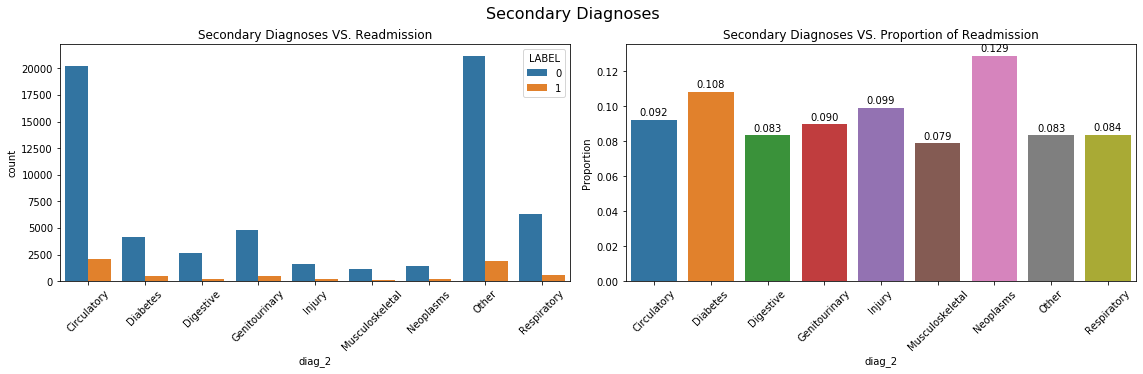

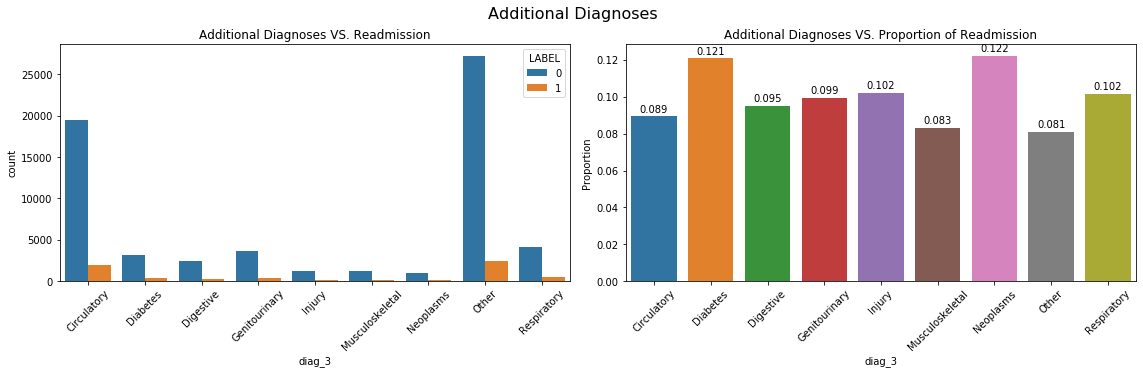

In [10]:
# Primary (diag_1), Secondary (diag_2) and Additional (diag_3) diagnoses.
cat_barplot(data=df, var='diag_1', txt='Primary Diagnoses', fgsz=(16, 5), xtickrot=45)
cat_barplot(data=df, var='diag_2', txt='Secondary Diagnoses', fgsz=(16, 5), xtickrot=45)
cat_barplot(data=df, var='diag_3', txt='Additional Diagnoses', fgsz=(16, 5), xtickrot=45)

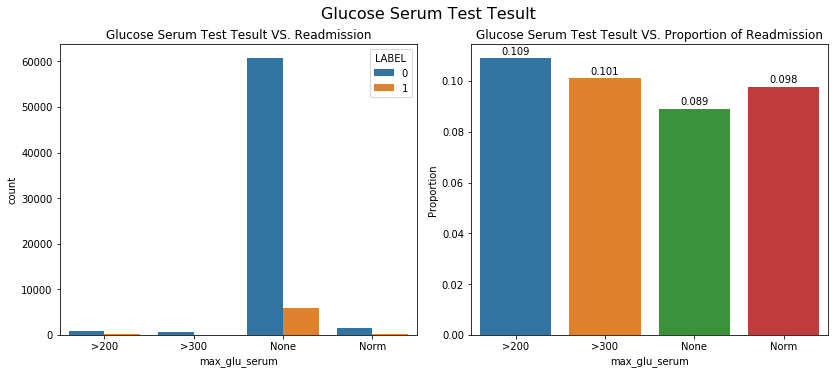

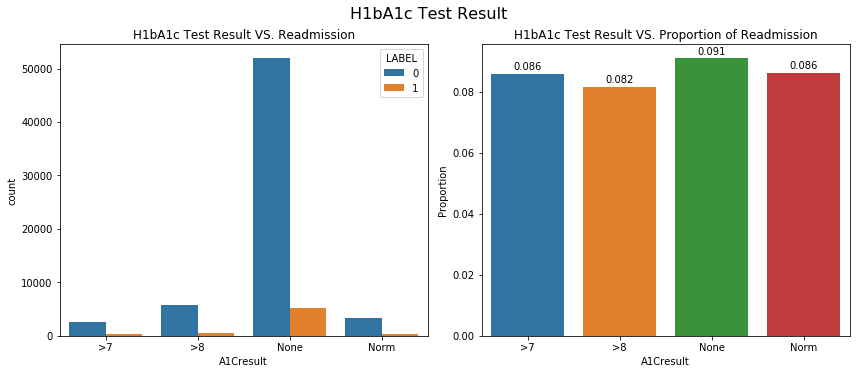

In [11]:
# lab test results
cat_barplot(data=df, var='max_glu_serum', txt='Glucose Serum Test Tesult', fgsz=(12, 5))
cat_barplot(data=df, var='A1Cresult', txt='H1bA1c Test Result', fgsz=(12, 5))

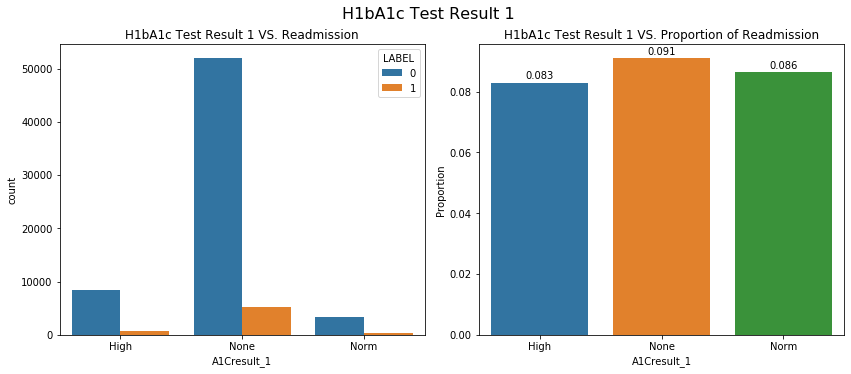

In [12]:
# regroup A1Cresult_1
df = df.assign(A1Cresult_1 = [A1Cresult if A1Cresult in ['Norm','None'] else 'High' for A1Cresult in df['A1Cresult']]) 
cat_barplot(data=df, var='A1Cresult_1', txt='H1bA1c Test Result 1', fgsz=(12, 5))

In [13]:
# diabetic medication generic names and usage in encounters

med_col = df.iloc[:,20:40].apply(pd.value_counts).T
med_col

,Down,No,Steady,Up
metformin,435.0,55070.0,13634.0,834.0
repaglinide,28.0,69056.0,818.0,71.0
nateglinide,8.0,69482.0,467.0,16.0
chlorpropamide,1.0,69902.0,66.0,4.0
glimepiride,136.0,66276.0,3331.0,230.0
acetohexamide,NaN,69972.0,1.0,NaN
glipizide,371.0,60966.0,8063.0,573.0
glyburide,418.0,62198.0,6744.0,613.0
tolbutamide,NaN,69956.0,17.0,NaN
pioglitazone,81.0,64710.0,5004.0,178.0


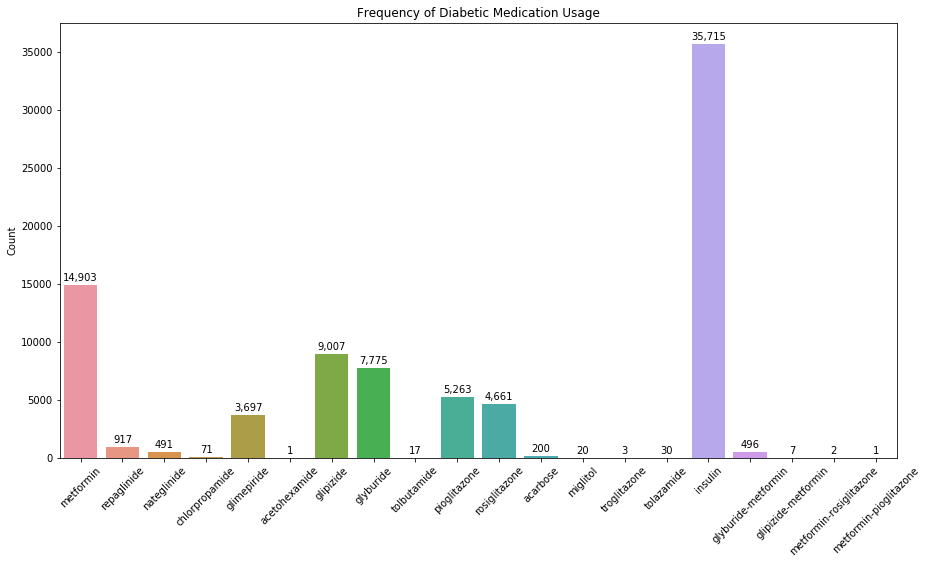

In [14]:
# frequency of diabetic medicaiton usage
freq = df.shape[0] - med_col.No
plt.figure(figsize=(15,8))
splot = sns.barplot(freq .index, freq .values)
splot.set_xticklabels(splot.get_xticklabels(), rotation=45, horizontalalignment='center')
splot.set_title('Frequency of Diabetic Medication Usage')
splot.set_ylabel('Count')
    
for p in splot.patches:
    plt.annotate(format(p.get_height(), ','+'.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')

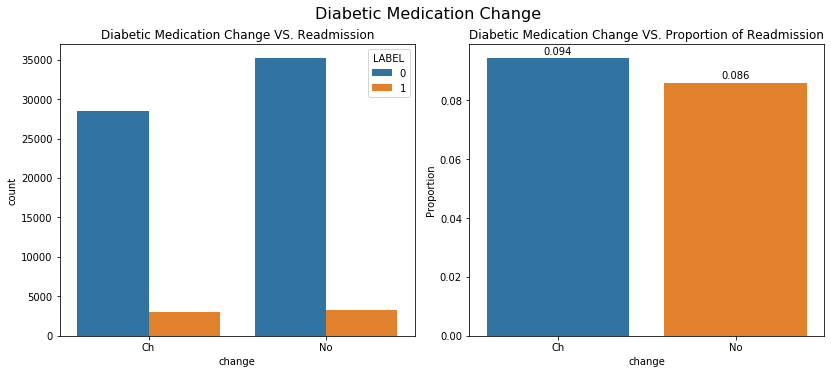

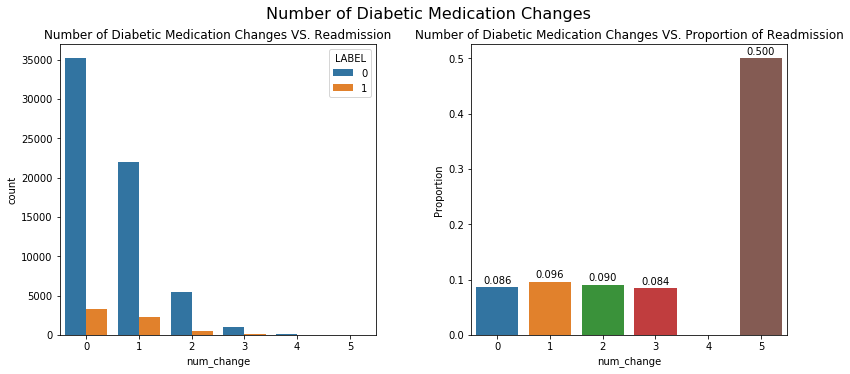

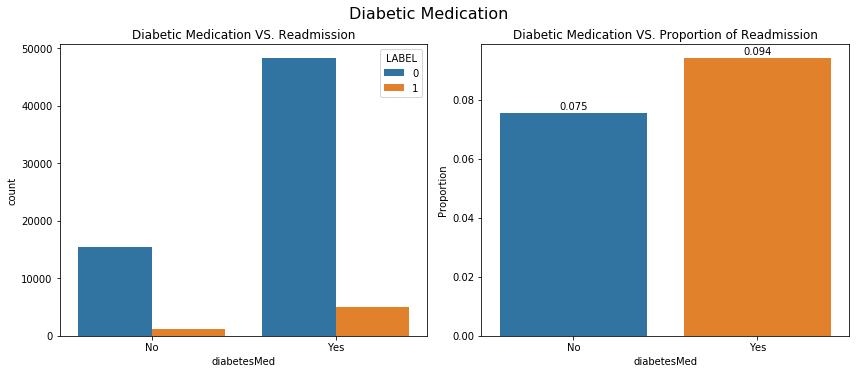

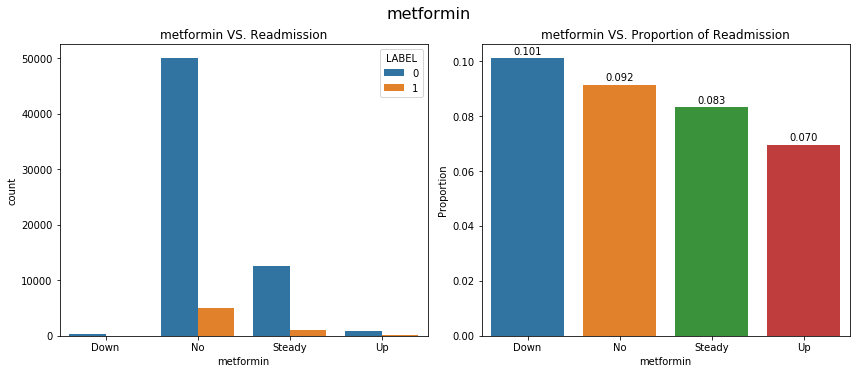

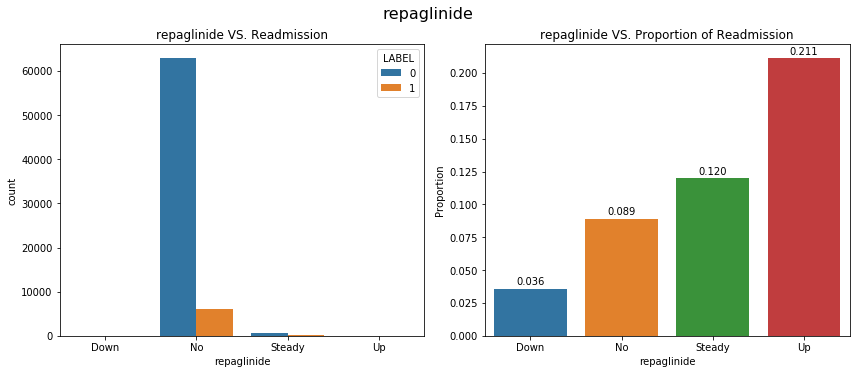

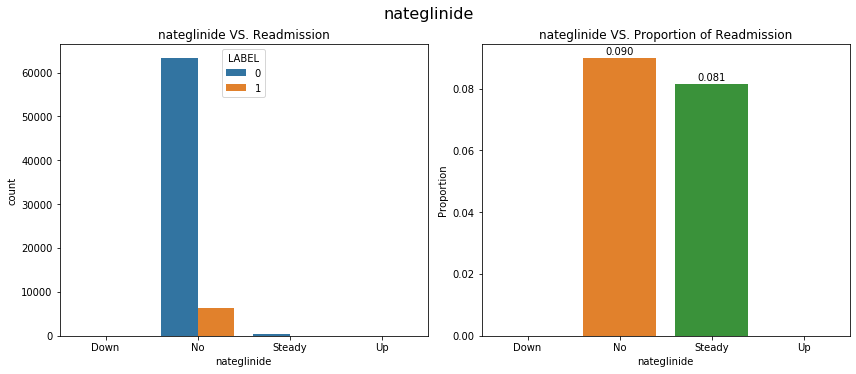

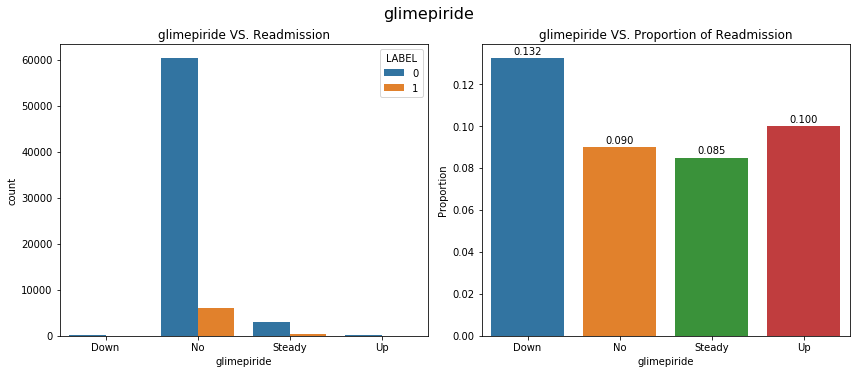

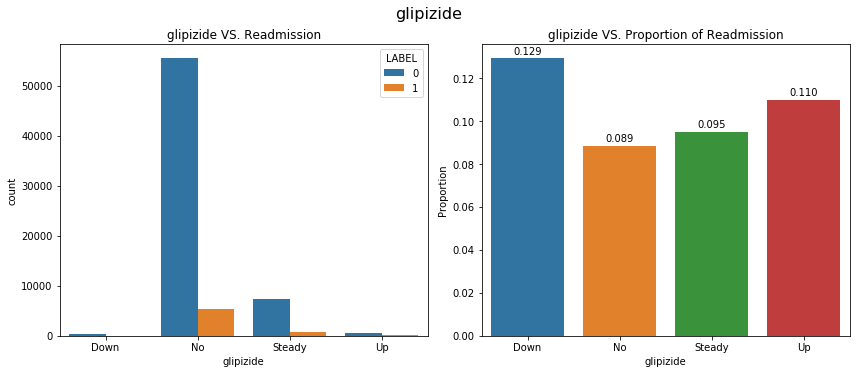

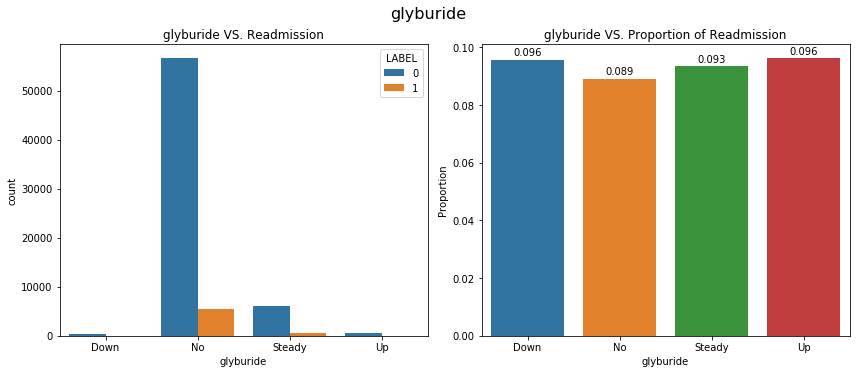

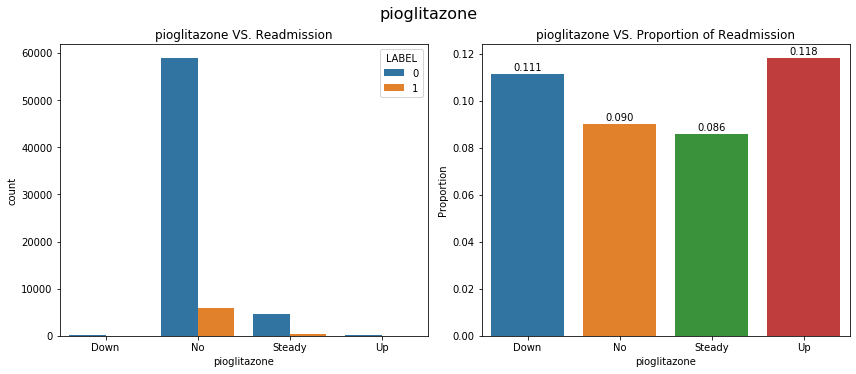

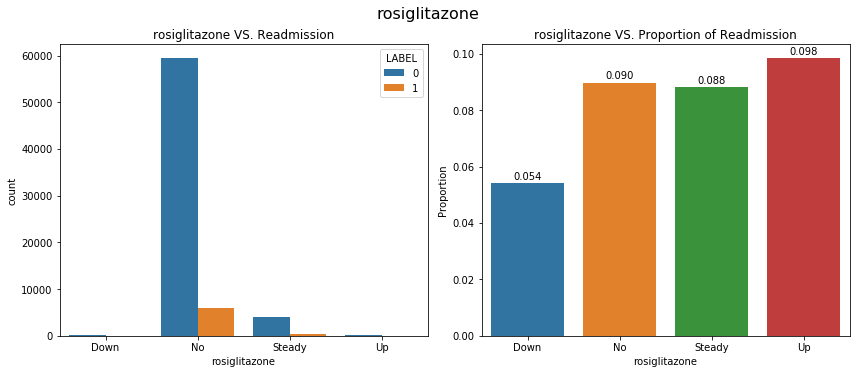

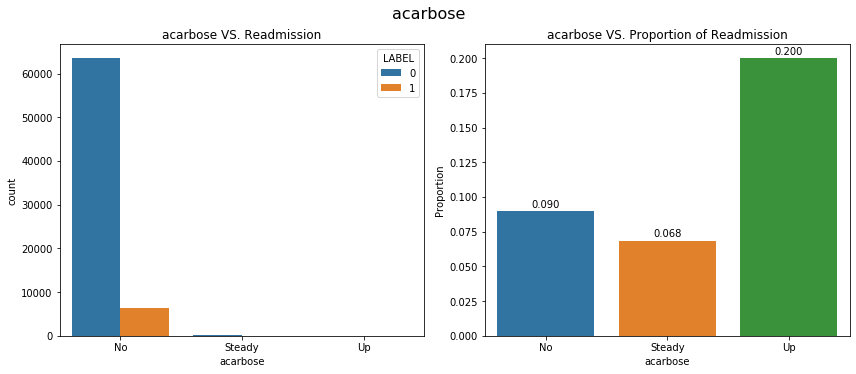

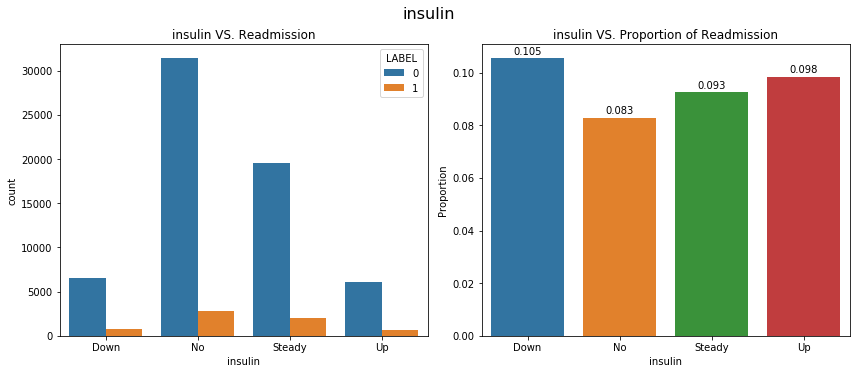

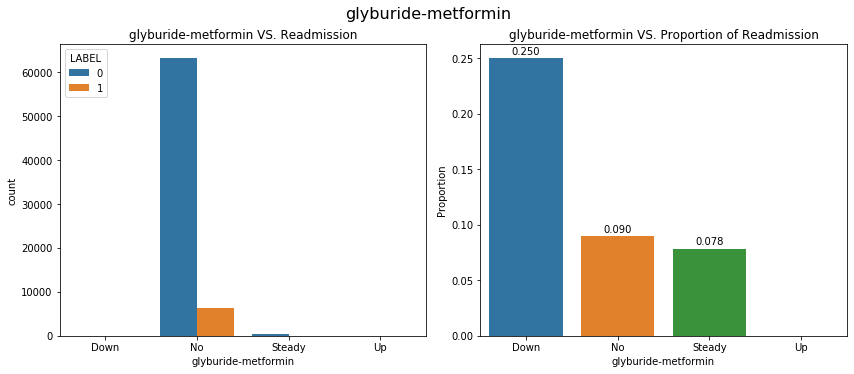

In [15]:
# Diabetic medications and their changes. Plot 10 diabetic medications which have been used in >= 200 encounters.
cat_barplot(data=df, var='change', txt='Diabetic Medication Change', fgsz=(12, 5))
cat_barplot(data=df, var='num_change', txt='Number of Diabetic Medication Changes', fgsz=(12, 5))
cat_barplot(data=df, var='diabetesMed', txt='Diabetic Medication', fgsz=(12, 5))

cat_var_med = list(freq[freq >= 200].index)
for m in cat_var_med:
    cat_barplot(data=df, var=m, txt=m, fgsz=(12, 5))

### Results and conclusions

- In three demographic variables, `race` and `age` have different proportion of readmission among variable categories. This means `race` and `age` are associated readmission.
 
 
- All three admission and discharge type variables, `admission_type_id`, `admission_source_id` and `discharge_disposition_id`, have different proportion of readmission among variable categories. 
 
 
- Encounters primarily diagnosed as injury and poisoning have higher proportion of readmission that other primary diagnoses. Whereas in secondary and additional diagnoses, *neoplasms* have the higher proportion of readmission. 
 
 
- Glucose serum test result shows that when the level is greater than 200, the proportion of readmission is higher than that in normal level. HbA1c test results didn’t show big difference between different test results levels in proportion of readmission. 
 
 
- There are 20 diabetic medications that have different levels of results. `Insulin`, `metformin`, `glipizide` and `glyburide` are the top four diabetic medications used in encounters. Except `glyburide`, other three diabetic medications are associated with proportion of readmission. In addition, in the top 11 diabetic medications, `repaglinide` is also associated with proportion of readmission  